## Лабораторная работа №7. Метод опорных векторов и логистическая регрессия в решении задач машинного обучения.
### Часть 2. Логистическая регрессия.

Используемый набор данных: [banknote authentication](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

In [1]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import os
import requests

%matplotlib inline

pd.options.display.max_columns = None

In [2]:
def downloadFile(url, filePath):
    if not os.path.exists(filePath):
        req = requests.get(url)
        f = open(filePath, "wb")
        f.write(req.content)
        f.close

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
fileName = "dataset/data_banknote_authentication.txt"
downloadFile(url, fileName)

Опишем заголовки колонок. Для удобства используем сокращенные названия:
- **Variance** - Variance of Wavelet Transformed image.
- **Skewness** - Skewness of Wavelet Transformed image.
- **Curtosis** - Curtosis of Wavelet Transformed image.
- **Entropy** - Entropy of image.

In [3]:
headers = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]  
data = pd.read_csv(fileName, names=headers)
data["Class"] = data["Class"].astype("category")
data.sample(40)

,Variance,Skewness,Curtosis,Entropy,Class
907,-1.39070,-1.37810,2.305500,-0.021566,1
247,2.05970,-0.99326,5.211900,-0.293120,0
566,2.64150,7.58600,-0.285620,-1.667700,0
770,0.34340,0.12415,-0.287330,0.146540,1
1174,-3.20510,-0.14279,0.975650,0.045675,1
637,3.30040,7.08110,-1.325800,0.222830,0
944,-2.12100,-0.05588,1.949000,1.353000,1
512,2.66480,10.75400,-3.399400,-4.168500,0
1371,-2.54190,-0.65804,2.684200,1.195200,1
416,4.34830,11.10790,-4.085700,-4.253900,0


In [4]:
display(data.isna().sum())
display(data.describe())

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


Пропусков в данных нет.

Подготовим данные и обучим модель.

In [5]:
X = data.drop(columns=["Class"]).copy()
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

Оценим получившуюся классификацию.

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       232
           1       0.97      1.00      0.99       180

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



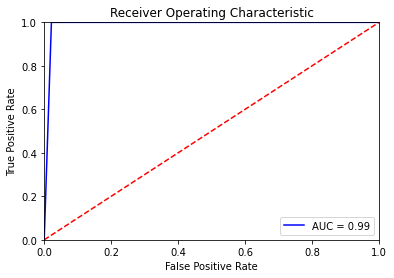

In [7]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f"%auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC-кривая и величина AUC говорят о качественной классификации. Если бы возникла необходимость в повышении качества модели, мы могли бы использовать один из [методов](https://ru.wikipedia.org/wiki/%D0%A1%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8#%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2).